In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
#import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
pwd

'/home/sreenath/Documents/NOAA/SPLASH/SPLASH_scripts'

In [6]:
#read in all the data into one pandas frame
def create_df(source):
    source_dir = '/home/sreenath/Documents/NOAA/SPLASH/' + source
    print(source_dir)
    
    #move into the iop folder
    os.chdir(source_dir)
    
    df = pd.DataFrame()
    for i, file_name in enumerate(os.listdir(source_dir)):
        if file_name.endswith('.FLX1'):
            print(file_name)
    #        print(i)
            x = pd.read_table(file_name,delimiter=r"\s+")
            df = pd.concat([df,x],axis=0)            
    return df


In [7]:
#%pwd
#source directory inside SPLASH directory
#source = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
file_dir = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
KP10_flux_df = create_df(file_dir)

file_dir = 'Tower_Data/Kettle_Ponds/KPB22_001-365'
KP03_flux_df = create_df(file_dir)


/home/sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPA22_001-365
KPA22_298.FLX1
KPA22_226.FLX1
KPA22_262.FLX1
KPA22_187.FLX1
KPA22_173.FLX1
KPA22_334.FLX1
KPA22_066.FLX1
KPA22_103.FLX1
KPA22_091.FLX1
KPA22_311.FLX1
KPA22_122.FLX1
KPA22_304.FLX1
KPA22_125.FLX1
KPA22_247.FLX1
KPA22_204.FLX1
KPA22_048.FLX1
KPA22_337.FLX1
KPA22_264.FLX1
KPA22_201.FLX1
KPA22_348.FLX1
KPA22_254.FLX1
KPA22_052.FLX1
KPA22_138.FLX1
KPA22_296.FLX1
KPA22_032.FLX1
KPA22_210.FLX1
KPA22_011.FLX1
KPA22_289.FLX1
KPA22_170.FLX1
KPA22_018.FLX1
KPA22_013.FLX1
KPA22_301.FLX1
KPA22_039.FLX1
KPA22_278.FLX1
KPA22_198.FLX1
KPA22_342.FLX1
KPA22_335.FLX1
KPA22_332.FLX1
KPA22_045.FLX1
KPA22_231.FLX1
KPA22_177.FLX1
KPA22_012.FLX1
KPA22_151.FLX1
KPA22_294.FLX1
KPA22_307.FLX1
KPA22_269.FLX1
KPA22_070.FLX1
KPA22_236.FLX1
KPA22_190.FLX1
KPA22_135.FLX1
KPA22_058.FLX1
KPA22_237.FLX1
KPA22_283.FLX1
KPA22_102.FLX1
KPA22_364.FLX1
KPA22_078.FLX1
KPA22_359.FLX1
KPA22_169.FLX1
KPA22_221.FLX1
KPA22_153.FLX1
KPA22_191.FLX1
KPA22_089.

In [8]:

KP10_flux_df['date'] = pd.to_datetime(KP10_flux_df.date,format='%Y-%m-%d')
KP03_flux_df['date'] = pd.to_datetime(KP03_flux_df.date,format='%Y-%m-%d')


<Axes: xlabel='date'>

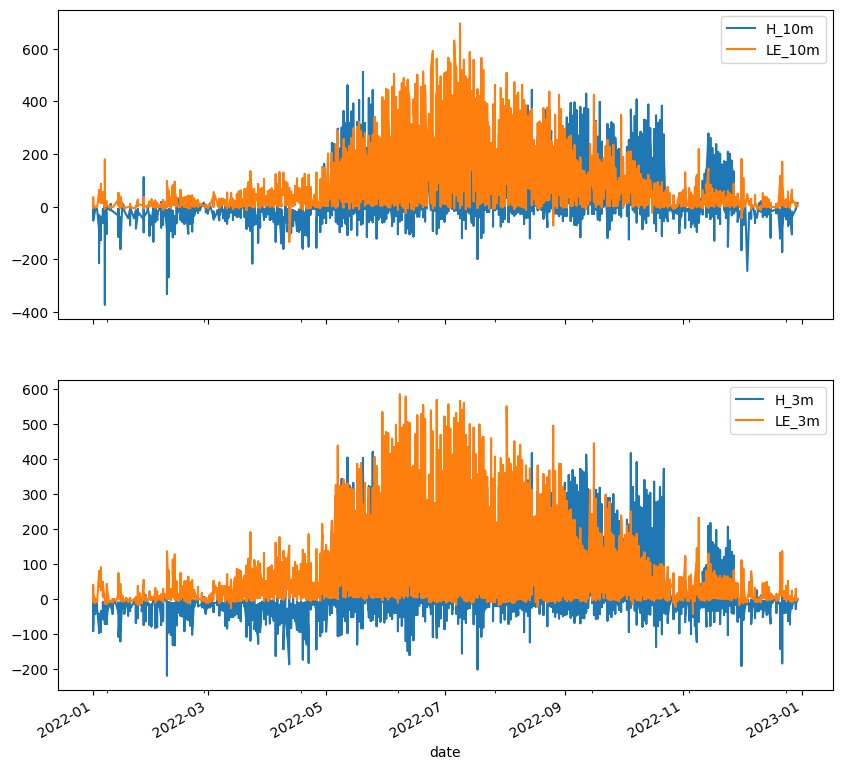

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1,  sharex=True, sharey=False, figsize=(10, 10))

def flux_qc_10(flux_df):
    #NAN filter
    H_f1 = flux_df['H_10m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_10m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


def flux_qc_03(flux_df):
    #NAN filter
    H_f1 = flux_df['H_3m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_3m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


flux_qc_10(KP10_flux_df).plot(x='date',y='H_10m',ax=ax1)
flux_qc_10(KP10_flux_df).plot(x='date',y='LE_10m',ax=ax1)

flux_qc_03(KP03_flux_df).plot(x='date',y='H_3m',ax=ax2)
flux_qc_03(KP03_flux_df).plot(x='date',y='LE_3m',ax=ax2)


Check out mid day bowen ratio, and soil moisture at the two levels.

In [10]:
KP10_flux_qc_df = flux_qc_10(KP10_flux_df).copy()
KP03_flux_qc_df = flux_qc_03(KP03_flux_df).copy()

In [64]:
# print(flux_qc_10(KP10_flux_df)['LE_10m'].size)
# print(flux_qc_03(KP03_flux_df)['LE_3m'].size)
#take the same time and make a df with entries at the same time:

flux_df_combined = pd.DataFrame()

flux_df_combined['date'] = KP10_flux_qc_df['date']
flux_df_combined['time(MST)'] = KP10_flux_qc_df['time(MST)']

flux_df_combined = flux_df_combined.merge(KP10_flux_qc_df, on=['date','time(MST)'], how='left')
flux_df_combined = flux_df_combined.merge(KP03_flux_qc_df, on=['date','time(MST)'], how='left')

In [65]:
flux_df_combined['date_time'] = pd.to_datetime(flux_df_combined['date'].astype(str) + ' ' + flux_df_combined['time(MST)'])

In [66]:
flux_df_combined = flux_df_combined.sort_values(by = 'date_time').set_index('date_time',drop=False)

In [68]:
flux_df_combined.columns

Index(['date', 'time(MST)', 'DecDay_x', 'H_10m', 'qc_H_x', 'LE_10m', 'qc_LE_x',
       'co2_flx_10m', 'co2_mix_ratio_x', 'Ts_10m', 'Tair_10m', 'pressure_x',
       'density_x', 'e_10m', 'es_10m', 'RH_x', 'Tdew_x', 'u_unrot_10m',
       'v_unrot_10m', 'w_unrot_10m', 'u_rot_10m', 'wind_speed_x',
       'max_wind_speed_x', 'wind_dir_x', 'u*_10m', 'TKE_10m', 'u_var_10m',
       'v_var_10m', 'w_var_10m', 'Ts_var_10m', 'co2_var_10m', 'h2o_var_10m',
       'DecDay_y', 'H_3m', 'qc_H_y', 'LE_3m', 'qc_LE_y', 'co2_flx_3m',
       'co2_mix_ratio_y', 'Ts_3m', 'Tair_3m', 'pressure_y', 'density_y',
       'e_3m', 'es_3m', 'RH_y', 'Tdew_y', 'u_unrot_3m', 'v_unrot_3m',
       'w_unrot_3m', 'u_rot_3m', 'wind_speed_y', 'max_wind_speed_y',
       'wind_dir_y', 'u*_3m', 'TKE_3m', 'u_var_3m', 'v_var_3m', 'w_var_3m',
       'Ts_var_3m', 'co2_var_3m', 'h2o_var_3m', 'date_time'],
      dtype='object')

In [69]:
# trial_flag1 = KP03_flux_qc_df['date'] >= '2022-01-01'
# trial_flag2 = KP03_flux_qc_df['date'] <= '2022-01-31'

# KP03_flux_qc_df.loc[trial_flag1 & trial_flag2]

In [71]:
pwd()

'/home/sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPB22_001-365'

In [77]:
#reading data from the kettle ponds minute data file
input_path = '/home/sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds'
os.chdir(input_path)
kp_met_df = pd.read_csv("KP22_001-365-MET.csv")

#convert the newer file into a csv and read or read it in as a string. 


In [78]:
kp_met_df.columns

Index(['     date time(MST)  DecDay wsp_3m wsp_5m wsp_10m dir_3m dir_5m dir_10m stheta_3m stheta_5m stheta_10m Pressure_Avg RH_Avg Tair1_3m Tair2_3m Tair1_5m Tair2_5m Tair1_10m Tair2_10m SurfT1 SurfT1_C SurfT2 SurfT2_C SurfT3 SurfT3_C Ts_Ta NetBodyT Rg_in_avg Rg_out_avg Lw_in_avg Lw_out_avg ghflx_a ghflx_b ghflx_c stor_a stor_b stor_c SoilT2a_Avg SoilT5a_Avg SoilT10a_Avg SoilT20a_Avg SoilT50a_Avg SoilT2b_Avg SoilT5b_Avg SoilT10b_Avg SoilT20b_Avg SoilT50b_Avg SoilT2c_Avg SoilT5c_Avg SoilT10c_Avg SoilT20c_Avg SoilT50c_Avg'], dtype='object')

No soil moisture?

<Axes: >

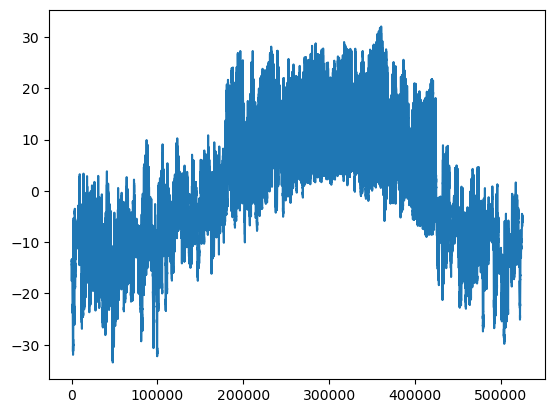

In [75]:
kp_met_df.SurfT1.plot()